**Importing required libaries** 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
import datetime as dt
import os

**Data processing ** 

In [2]:
data = pd.read_csv("netflix.csv")

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.shape

(8790, 10)

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
# dropped ALL the duplicate values
data.drop_duplicates(subset ="show_id",keep = False, inplace = True)
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [9]:
#changing datatype of date_added column to datetime
data["date_added"] = pd.to_datetime(data["date_added"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [10]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


**Analyzing data**

In [11]:
# added month_added column
data['month_added'] = data['date_added'].dt.month_name()
data


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June


In [12]:
# added year_added column
data['year_added'] = data['date_added'].dt.year
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018


In [13]:
# added day_added column
data['day_added']=data['date_added'].dt.day_name()
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [38]:
#types of show on netflix
types =data.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types


,count
type,
Movie,6126
TV Show,2664


In [15]:
#grouped by directors of show and type
show_director= data.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director


,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [18]:
#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
127,Alastair Fothergill,TV Show,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2623,Marcus Raboy,Movie,15
2699,Martin Scorsese,Movie,12
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18


In [19]:
#grouped by contry and type
show_origin= data.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
show_origin


,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [25]:
#write query to find top20 country
top20_country=show_origin.query("`show_count` >= 81")
top20_country.sort_values('show_count', ascending=False)

,country,type,show_count
130,United States,Movie,2395
47,India,Movie,976
131,United States,TV Show,845
128,United Kingdom,Movie,387
87,Pakistan,TV Show,350
84,Not Given,Movie,257
129,United Kingdom,TV Show,251
15,Canada,Movie,187
60,Japan,TV Show,172
110,South Korea,TV Show,165


In [26]:
#grouped by listed_In and type
show_genre= data.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre
# show_genre.sort_values('show_genre_count', ascending=False)

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [23]:
#write query to find top20 genre
top20_genre=show_genre.query("`show_genre_count` >= 110")
# top20_genre
top20_genre.sort_values('show_genre_count', ascending=False)

,listed_in,type,show_genre_count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
421,Kids' TV,TV Show,219
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180


In [28]:
#grouped by rating and type
show_rating= data.groupby(['rating','type'])[ 'rating'].count().reset_index(name='ratings_count')
# show_rating=show_rating.set_index('rating')
show_rating

,rating,type,ratings_count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [29]:
# filtered  by type = movie

rating_movie= data.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
# rating_movie=rating_movie.set_index('rating')
rating_movie

filter = rating_movie["type"]=="Movie"
  
# filtering data
rating_movie.where(filter, inplace = True)
rating_movie= rating_movie.dropna()
rating_movie

,rating,type,ratings_count
0,G,Movie,41.0
1,NC-17,Movie,3.0
2,NR,Movie,75.0
4,PG,Movie,287.0
5,PG-13,Movie,490.0
6,R,Movie,797.0
8,TV-14,Movie,1427.0
10,TV-G,Movie,126.0
12,TV-MA,Movie,2062.0
14,TV-PG,Movie,540.0


In [30]:
# filtered  by type = TV show

rating_TV= data.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
# rating_TV=rating_TV.set_index('rating')
rating_TV

filter = rating_TV["type"]=="TV Show"
  
# filtering data
rating_TV.where(filter, inplace = True)
rating_TV= rating_TV.dropna()
rating_TV

,rating,type,ratings_count
3,NR,TV Show,4.0
7,R,TV Show,2.0
9,TV-14,TV Show,730.0
11,TV-G,TV Show,94.0
13,TV-MA,TV Show,1143.0
15,TV-PG,TV Show,321.0
17,TV-Y,TV Show,175.0
19,TV-Y7,TV Show,194.0
21,TV-Y7-FV,TV Show,1.0


In [31]:

#grouped by duration and type

dsc= data.groupby(['duration','type'])[ 'type'].count().reset_index(name='dsc')
dsc
#SORT
dsc.sort_values(by=['type'], ascending=False)



,duration,type,dsc
0,1 Season,TV Show,1791
25,12 Seasons,TV Show,2
208,9 Seasons,TV Show,9
196,8 Seasons,TV Show,17
185,7 Seasons,TV Show,23
...,...,...,...
86,171 min,Movie,7
87,172 min,Movie,4
88,173 min,Movie,6
89,174 min,Movie,2


In [32]:
#grouped by month_added and type
release_month= data.groupby(['month_added','type'])[ 'type'].count().reset_index(name='release_month')
release_month

,month_added,type,release_month
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


In [33]:
#grouped by year_added and type
release_year= data.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count')
release_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [34]:
#grouped by day_added and type
release_Day= data.groupby(['day_added','type'])[ 'type'].count().reset_index(name='release_Day')
release_Day

,day_added,type,release_Day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


**Share**

Text(0.5, 1.0, 'types_of_show')

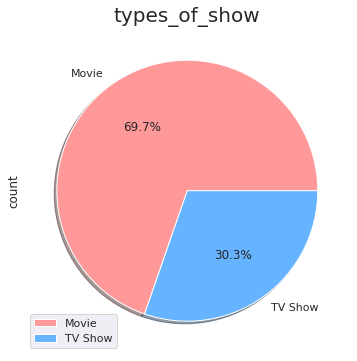

In [39]:
# percentage of types of show
colors = ['#ff9999','#66b3ff']
types.plot.pie(y='count',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('types_of_show', fontsize=20)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

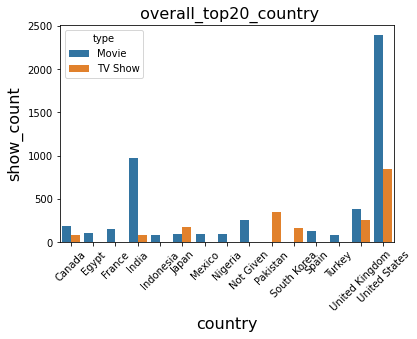

In [36]:
sns.barplot(x =top20_country.reset_index()['country'], y=top20_country.reset_index()['show_count'],
            hue =  top20_country.reset_index()['type']);
plt.title(' overall_top20_country', fontsize=16)
plt.xlabel('country', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

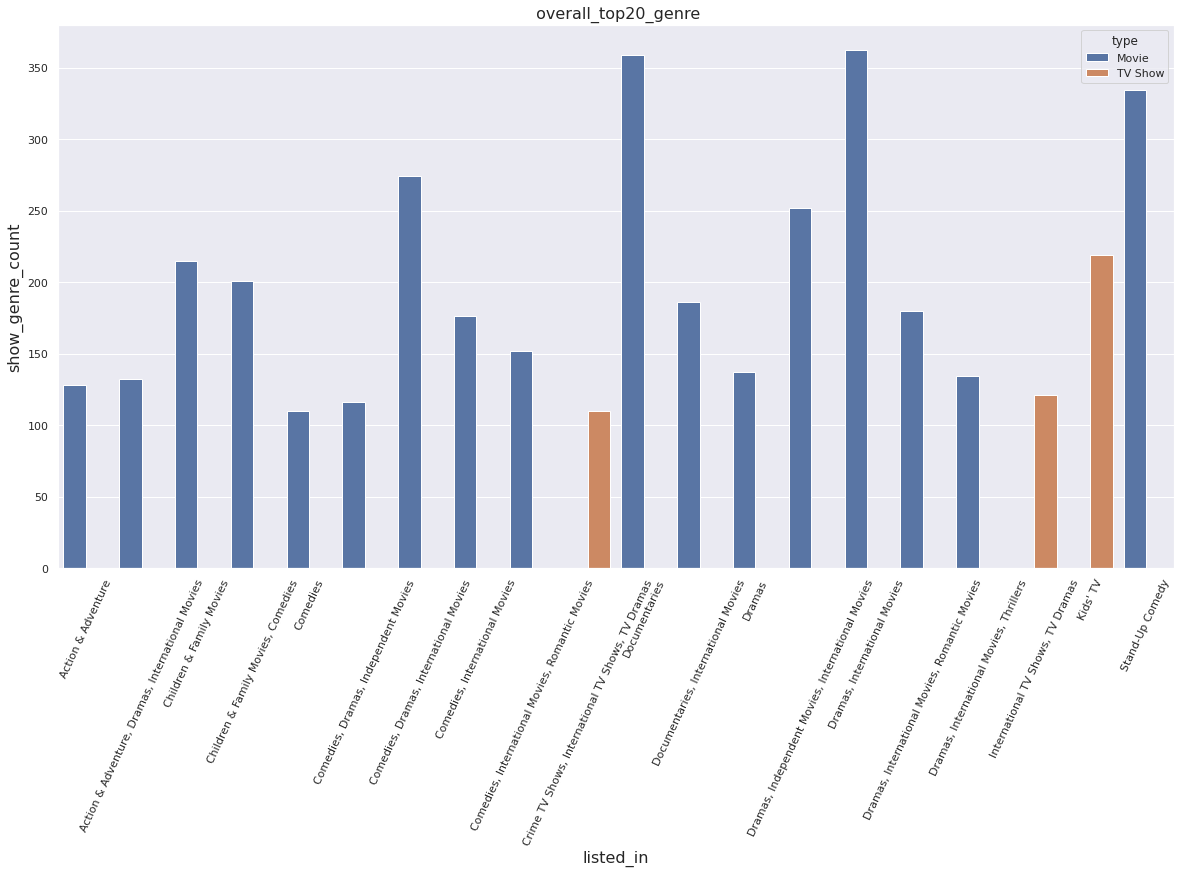

In [40]:
sns.barplot(x =top20_genre.reset_index()['listed_in'], y=top20_genre.reset_index()['show_genre_count'],
            hue =  top20_genre.reset_index()['type']);
plt.title(' overall_top20_genre', fontsize=16)
plt.xlabel('listed_in', fontsize=16);
plt.ylabel('show_genre_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 65)

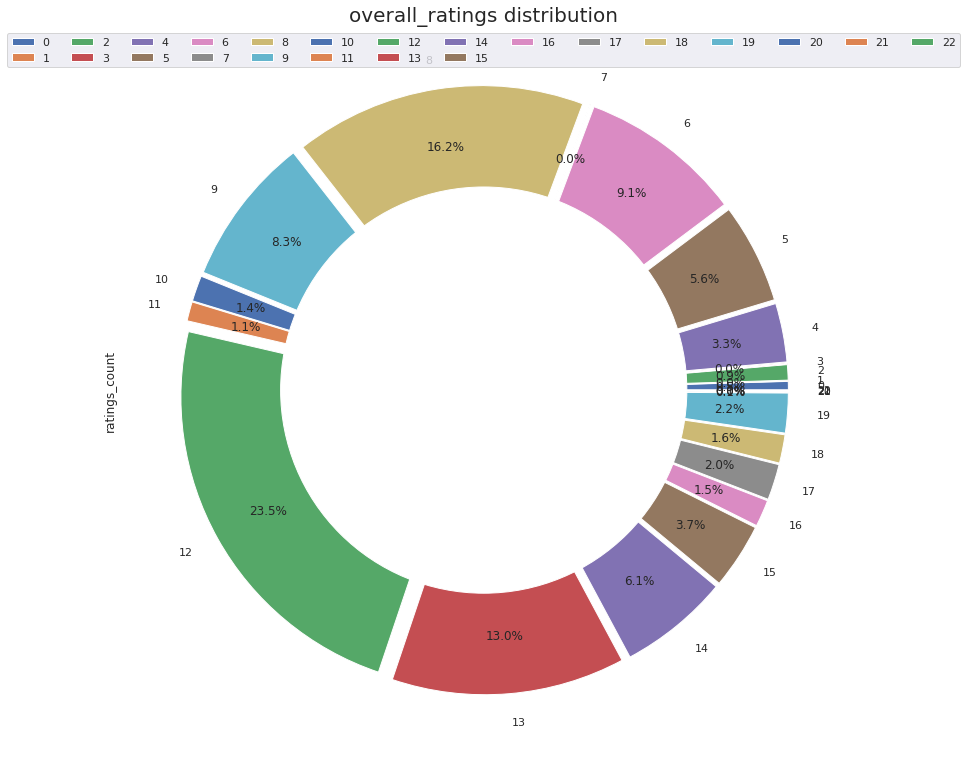

In [41]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

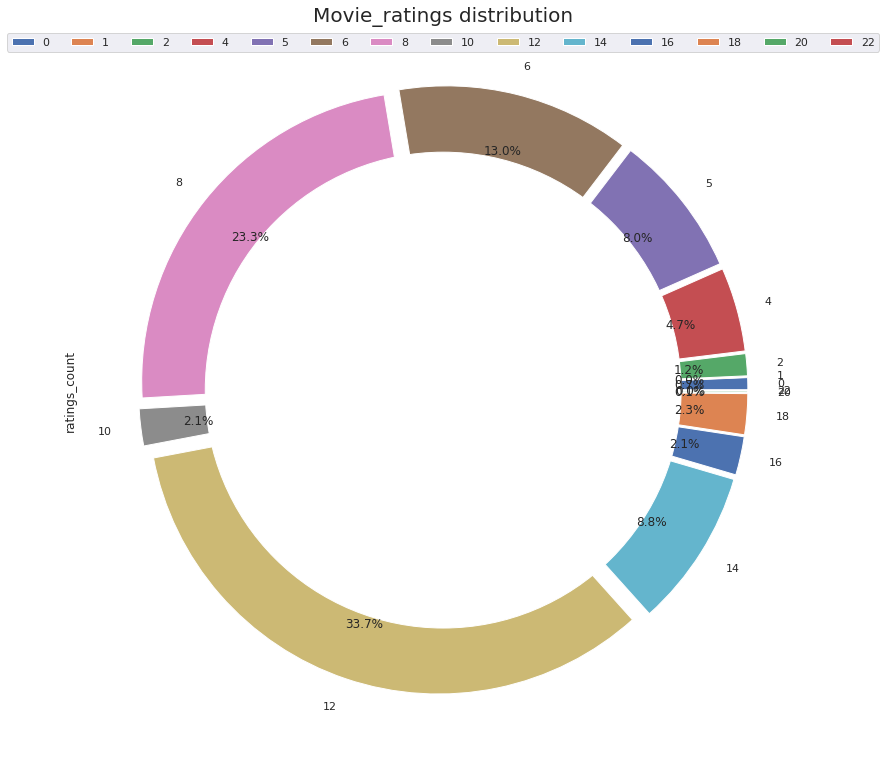

In [42]:

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )
rating_movie.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('Movie_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")



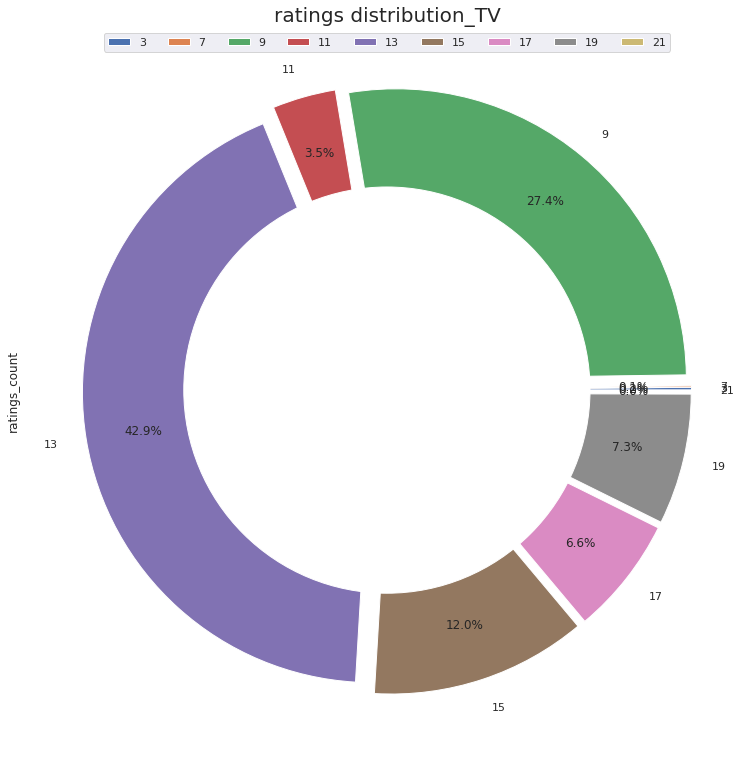

In [43]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,)
rating_TV.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('ratings distribution_TV', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

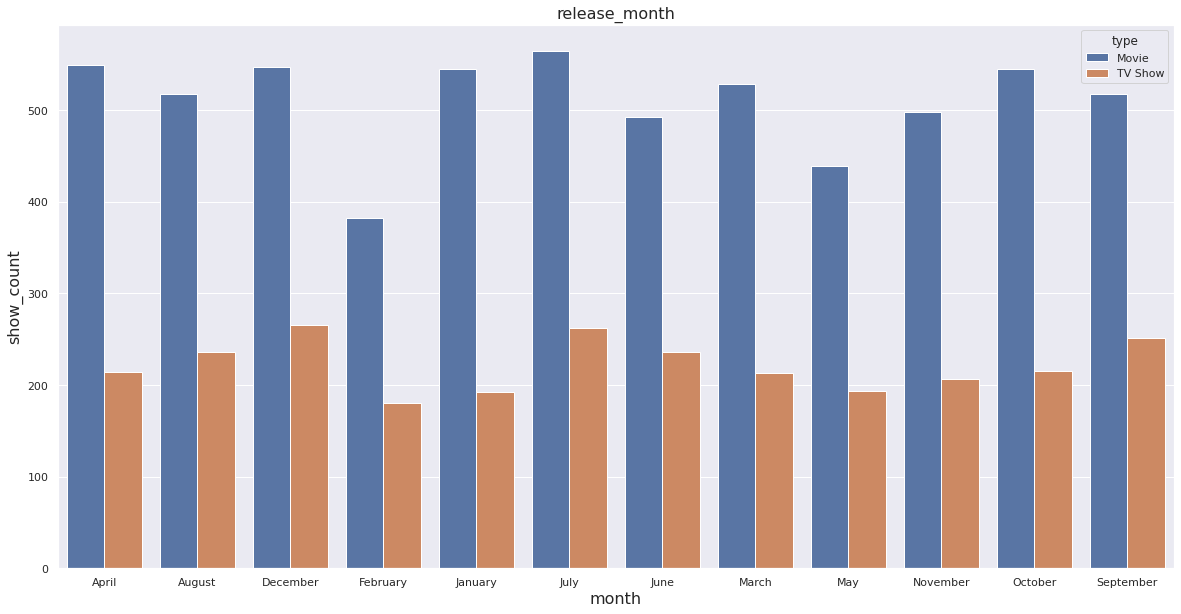

In [44]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

[Text(0, 0.5, 'release_count'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'release_per_year')]

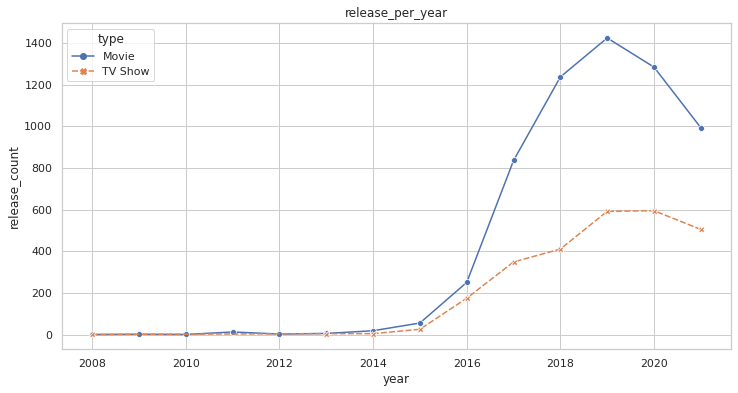

In [45]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')

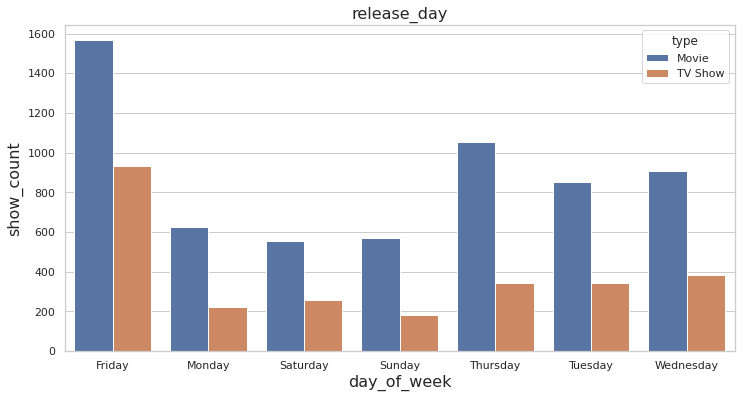

In [46]:
sns.barplot(x =release_Day.reset_index()['day_added'], y= release_Day.reset_index()['release_Day'],
            hue =  release_Day.reset_index()['type']);
plt.title('release_day' , fontsize=16)
plt.xlabel('day_of_week', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

**`Findings`**



* A pie chart comparing Netflix movie uploads to TV show uploads from 2008 to 2021 reveals a 39.4% increase in movie uploads.

* Netflix has the most movies from the United States, followed by India in second place and the United Kingdom in third place. It also has the most TV episodes from the United States, followed by Pakistan in second place and the United Kingdom in third place.

* Netflix has the most titles in the "Dramas, International Movies" genre, followed byCrime TV Shows, International TV Shows, TV Dramas' in second place and Stand-Up Comedy in third, according to the overall top 20 genre barchart. and one of the key findings is that the majority of TV programmes are intended for kids tv.

* In the overall rating distribution donut chart, we can see that 36.5% of the shows have TV-MA ratings, indicating that the majority of the shows are for mature audiences, with TV-14 ratings coming in second. Parental Guidelines denotes content, and R rating at the third R classification denotes that the film is not suitable for minors to watch due to violence, offensive language, or sexual activity.

* The movie rating distribution donut chart reveals that 33.7% of movies are rated TV-MA. A TV-MA rating indicates that the show is meant for mature audiences. The second most shows are classified TV-14, which means that Parental Guidelines indicates content for mature audiences, and the third most shows are rated R, which implies that they are not acceptable for children to watch due to violence, foul language, or sexual activity.

* The TV rating distribution donut chart reveals that 42.9% of moviesTV show are rated TV-MA, which means that the broadcasts are meant for mature audiences. The second most shows are rated TV-14, which implies that Parental Guidelines indicates content for mature audiences, and the third most series are rated TV-PG, which denotes under parental guidance.

* The release month barchart indicates that Netflix routinely releases new shows throughout the year.

* In the release per year linechart, we can observe that Netflix began to add shows in large quantities from 2014.

* The majority of the shows on Netflix are released on Friday, as can be seen in the release day barchart.

